#### Cats Vs Dogs classifier using CNN 

#### Dependencies

In [339]:
import os
import zipfile
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


you can use the cell below to download the data

In [340]:
#!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

#### Loading Data

In [341]:
Zipped_data = zipfile.ZipFile('./cats_and_dogs_filtered.zip', 'r')
Zipped_data.extractall()
Zipped_data.close()

In [342]:
base_dir = './cats_and_dogs_filtered/'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


#### load images from directories

In [343]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [344]:
cat_train = os.listdir(train_cats_dir)
dog_train = os.listdir( train_dogs_dir )


In [345]:
print(cat_train[:5])
print(dog_train[:5])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg']


In [346]:
import random
import matplotlib.image as mpimg

def generate_random_cat_path():
    random_number = random.randint(1, 500)
    return f"cats_and_dogs_filtered/train/cats/cat.{random_number}.jpg"

def generate_random_dog_path():
    random_number = random.randint(1, 500)
    return f"cats_and_dogs_filtered/train/dogs/dog.{random_number}.jpg"

cats_random_paths = [generate_random_cat_path() for _ in range(8)]
dogs_random_paths = [generate_random_dog_path() for _ in range(8)]
all_images = cats_random_paths + dogs_random_paths
random.shuffle(all_images)

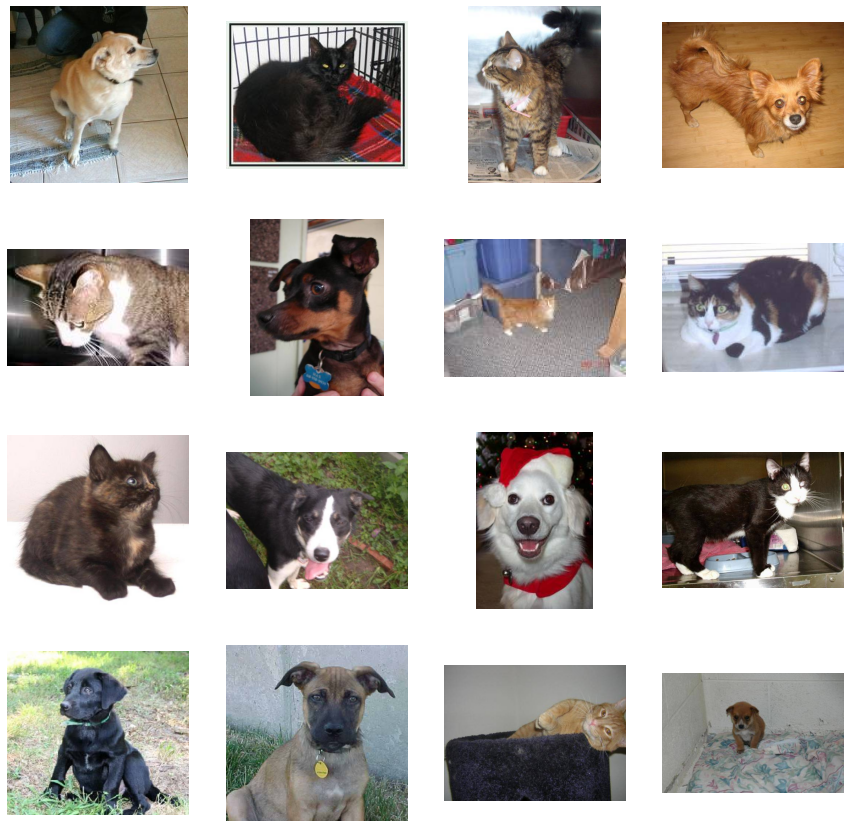

In [347]:
fig , axes = plt.subplots(4,4 ,figsize=(15,15))
for row in range(4):
    for column in range(4):
        img = mpimg.imread(all_images[row*4+column])
        axes[row,column].imshow(img)
        axes[row,column].axis('off')
        

#### Building the CNN model

In [348]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [349]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 74, 74, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 17, 17, 64)      

In [350]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics = ['accuracy'])

#### Making generators

In [351]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1.0/255)
test_datagen  = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode='binary',target_size=(150, 150))    
validation_generator =  test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode  = 'binary',target_size =(150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### Training the model

In [352]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',baseline=0.70,min_delta=0.01,mode='max', patience=6,verbose=1)

In [357]:
history = model.fit(train_generator,epochs=13,validation_data=validation_generator, verbose=1)

Epoch 1/13
100/100 [==============================] - 6s 61ms/step - loss: 0.0941 - accuracy: 0.9680 - val_loss: 1.4881 - val_accuracy: 0.7260
Epoch 2/13
100/100 [==============================] - 6s 60ms/step - loss: 0.0779 - accuracy: 0.9785 - val_loss: 1.7132 - val_accuracy: 0.7210
Epoch 3/13
100/100 [==============================] - 6s 58ms/step - loss: 0.0733 - accuracy: 0.9785 - val_loss: 1.8639 - val_accuracy: 0.7390
Epoch 4/13
100/100 [==============================] - 6s 58ms/step - loss: 0.0811 - accuracy: 0.9800 - val_loss: 1.9925 - val_accuracy: 0.7250
Epoch 5/13
100/100 [==============================] - 6s 59ms/step - loss: 0.0757 - accuracy: 0.9810 - val_loss: 1.4675 - val_accuracy: 0.7220
Epoch 6/13
100/100 [==============================] - 6s 59ms/step - loss: 0.0695 - accuracy: 0.9820 - val_loss: 1.9556 - val_accuracy: 0.7280
Epoch 7/13
100/100 [==============================] - 6s 58ms/step - loss: 0.0741 - accuracy: 0.9795 - val_loss: 2.0994 - val_accuracy: 0.7410

In [358]:
from tensorflow.keras.utils import load_img, img_to_array

def generate_random_test_cat_path():
    random_number = random.randint(2001, 2490)
    return f"cats_and_dogs_filtered/validation/cats/cat.{random_number}.jpg"

def generate_random_test_dog_path():
    random_number = random.randint(2001, 2490)
    return f"cats_and_dogs_filtered/validation/dogs/dog.{random_number}.jpg"

In [359]:
test_cats_random_path = [generate_random_test_cat_path() for i in range(8)]
test_dogs_random_path = [generate_random_test_dog_path() for i in range(8)]
dog_imgs = [load_img(test_dogs_random_path[i],target_size=(150,150)) for i in range(8)]
cat_imgs = [load_img(test_cats_random_path[i] , target_size=(150,150)) for i in range(8)]
test_imgs = dog_imgs + cat_imgs

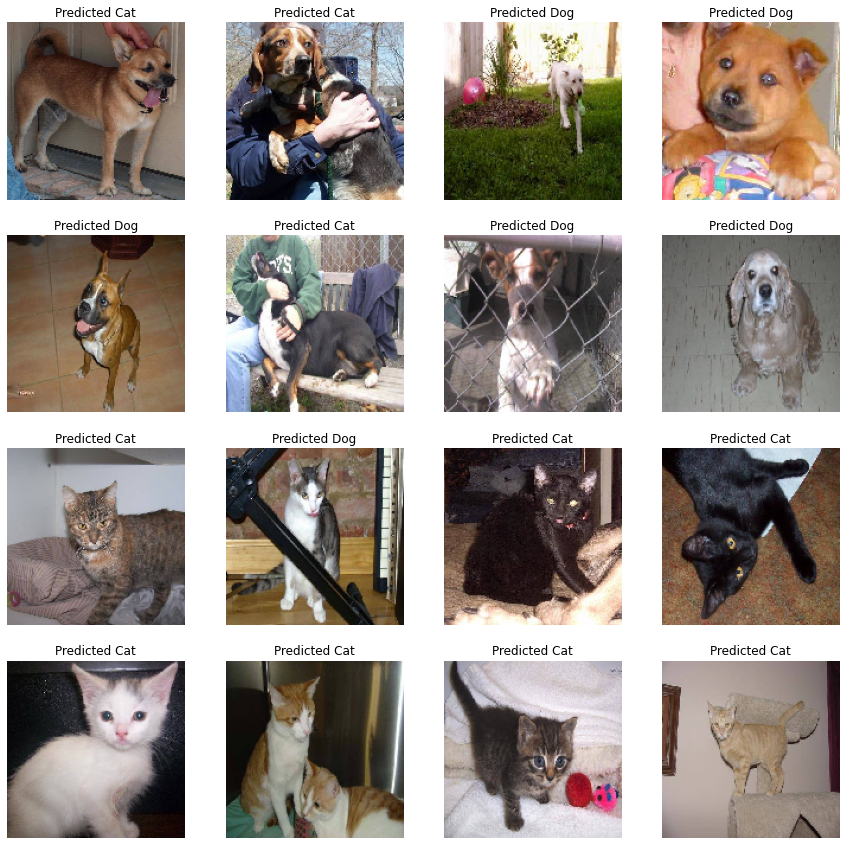

In [360]:
fig , axes = plt.subplots(4, 4, figsize=(15, 15))

for row in range(4):
    for column in range(4):
        img = (test_imgs[row*4+column])
        axes[row,column].imshow(img)
        axes[row,column].axis('off')
        img_arr = img_to_array(img)/255
        img_arr = np.expand_dims(img_arr,axis=0)
        pred = model.predict(img_arr)
        if pred > 0.5 :
            pred = "Predicted Dog"
        else:
            pred = "Predicted Cat"
        axes[row,column].set_title(pred)


 As you can see the model is not predicting bad , i think it's working quite good for 60MB dataset. <br>